In [0]:
# Predict Google stocks for a specific day using Support Vector Regression

In [0]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
#Get the stock quote
df = web.DataReader('GOOGL', data_source='yahoo', start='2020-05-01', end='2020-05-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-01,1351.430054,1309.660034,1324.089966,1317.319946,2443600,1317.319946
2020-05-04,1324.469971,1296.010010,1308.130005,1322.900024,1540300,1322.900024
2020-05-05,1371.010010,1335.030029,1337.500000,1349.020020,1983300,1349.020020
2020-05-06,1368.689941,1345.130005,1358.000000,1345.430054,1586600,1345.430054
2020-05-07,1376.000000,1352.540039,1361.310059,1369.280029,1532600,1369.280029
2020-05-08,1396.640015,1372.010010,1381.819946,1384.339966,1666300,1384.339966
2020-05-11,1415.530029,1375.500000,1376.790039,1403.589966,1633700,1403.589966
2020-05-12,1414.329956,1374.510010,1408.219971,1375.180054,1695900,1375.180054
2020-05-13,1385.329956,1328.010010,1376.160034,1348.329956,2018400,1348.329956


In [0]:
actual_price = df.tail(1)
actual_price

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-29,1436.72998,1415.97998,1420.430054,1433.52002,1852200,1433.52002


In [0]:
df = df.head(len(df)-1)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-01,1351.430054,1309.660034,1324.089966,1317.319946,2443600,1317.319946
2020-05-04,1324.469971,1296.010010,1308.130005,1322.900024,1540300,1322.900024
2020-05-05,1371.010010,1335.030029,1337.500000,1349.020020,1983300,1349.020020
2020-05-06,1368.689941,1345.130005,1358.000000,1345.430054,1586600,1345.430054
2020-05-07,1376.000000,1352.540039,1361.310059,1369.280029,1532600,1369.280029
2020-05-08,1396.640015,1372.010010,1381.819946,1384.339966,1666300,1384.339966
2020-05-11,1415.530029,1375.500000,1376.790039,1403.589966,1633700,1403.589966
2020-05-12,1414.329956,1374.510010,1408.219971,1375.180054,1695900,1375.180054
2020-05-13,1385.329956,1328.010010,1376.160034,1348.329956,2018400,1348.329956


In [0]:
days = list()
adj_close_prices = list()

In [0]:
# Get the date and adj close price
df_days = df.index.day
df_adj_close = df.loc[:, 'Adj Close']

In [0]:
len(df_days)

19

In [0]:
# Create the independent dataset
for day in df_days:
  days.append([day])

# Create the dependent dataset
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [0]:
days

[[1],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13],
 [14],
 [15],
 [18],
 [19],
 [20],
 [21],
 [22],
 [26],
 [27],
 [28]]

In [0]:
# Create the three SVR models

# Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a linear kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

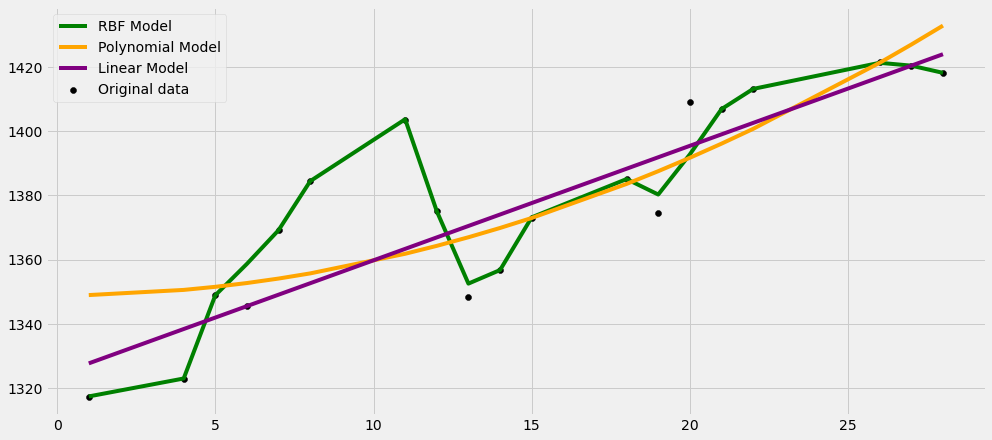

In [0]:
# Plot the models on a graph
plt.figure(figsize=(15, 7))
plt.scatter(days, adj_close_prices, color='black', label='Original data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.legend()
plt.show()

In [0]:
# Show the predictions made by the models
day = [[30]]

print('The RBF model predicted', rbf_svr.predict(day))
print('The Polynomial model predicted', poly_svr.predict(day))
print('The Linear model predicted', lin_svr.predict(day))

The RBF model predicted [1400.23033752]
The Polynomial model predicted [1445.27009509]
The Linear model predicted [1431.07288295]


In [0]:
print('The actual price: ', actual_price['Adj Close'])

The actual price:  Date
2020-05-29    1433.52002
Name: Adj Close, dtype: float64
